## Preprocessing

In [29]:
csv_uri = '../Preprocessing/test/db1/data_MfccDwtChromaCqtdb1L1.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_NEW/MVP/New_MVP_062.wav,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,...,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150,MVP
1,../data/DWT_NEW/MVP/New_MVP_109.wav,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,...,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817,MVP
2,../data/DWT_NEW/MVP/New_MVP_009.wav,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,...,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093,MVP
3,../data/DWT_NEW/MVP/New_MVP_177.wav,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,...,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518,MVP
4,../data/DWT_NEW/MVP/New_MVP_069.wav,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,...,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704,MVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,../data/DWT_NEW/AS/New_AS_171.wav,-339.158112,40.213173,-36.526974,-53.637939,-18.601725,-12.249957,-10.941161,-9.111422,-10.798549,...,0.040663,0.033821,0.044480,0.047381,0.049833,0.045619,0.043067,0.030173,0.025898,AS
896,../data/DWT_NEW/AS/New_AS_067.wav,-501.082001,89.517166,25.677994,-4.297906,-10.959665,-17.939556,-20.772755,-15.514157,-15.844445,...,0.003850,0.002997,0.001923,0.001676,0.001316,0.000971,0.000981,0.001023,0.000886,AS
897,../data/DWT_NEW/AS/New_AS_174.wav,-307.757050,51.899139,-23.147026,-28.208418,-22.437355,-13.074753,-12.573600,-9.405491,-10.770848,...,0.027149,0.027509,0.045420,0.052697,0.049330,0.044515,0.036902,0.025493,0.022228,AS
898,../data/DWT_NEW/AS/New_AS_189.wav,-334.683624,87.311577,6.389525,-1.465219,-13.921110,-18.471697,-14.806891,-16.474894,-18.158365,...,0.009755,0.009753,0.007868,0.007349,0.005529,0.002896,0.002681,0.003235,0.002716,AS


In [30]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [31]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,-6.286917,...,0.003381,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150
1,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,-13.717781,...,0.007207,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817
2,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,-12.313032,...,0.001414,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093
3,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,-11.157784,...,0.043850,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518
4,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,-6.307548,...,0.002647,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-339.158112,40.213173,-36.526974,-53.637939,-18.601725,-12.249957,-10.941161,-9.111422,-10.798549,-5.611834,...,0.035250,0.040663,0.033821,0.044480,0.047381,0.049833,0.045619,0.043067,0.030173,0.025898
896,-501.082001,89.517166,25.677994,-4.297906,-10.959665,-17.939556,-20.772755,-15.514157,-15.844445,-12.956374,...,0.005172,0.003850,0.002997,0.001923,0.001676,0.001316,0.000971,0.000981,0.001023,0.000886
897,-307.757050,51.899139,-23.147026,-28.208418,-22.437355,-13.074753,-12.573600,-9.405491,-10.770848,-8.731351,...,0.032781,0.027149,0.027509,0.045420,0.052697,0.049330,0.044515,0.036902,0.025493,0.022228
898,-334.683624,87.311577,6.389525,-1.465219,-13.921110,-18.471697,-14.806891,-16.474894,-18.158365,-17.774797,...,0.008435,0.009755,0.009753,0.007868,0.007349,0.005529,0.002896,0.002681,0.003235,0.002716


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(180,)
(720, 112, 1)
(180, 112, 1)


In [34]:
X_train.shape[2], y.shape

(1, (900,))

In [35]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [36]:
# LSTM tensorflow
model = tf.keras.Sequential([
    # tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    # tf.keras.layers.Dense(32,activation='relu'),

    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),

    # tf.keras.layers.Dense(5, activation='softmax')
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),


    tf.keras.layers.Dense(5, activation='softmax')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
45/45 [==============================] - 3s 34ms/step - loss: 1.5357 - acc: 0.3833 - val_loss: 1.4293 - val_acc: 0.6111
Epoch 2/50
45/45 [==============================] - 1s 24ms/step - loss: 1.3348 - acc: 0.5778 - val_loss: 1.2008 - val_acc: 0.6167
Epoch 3/50
45/45 [==============================] - 1s 23ms/step - loss: 1.1044 - acc: 0.6653 - val_loss: 0.9902 - val_acc: 0.7333
Epoch 4/50
45/45 [==============================] - 1s 23ms/step - loss: 0.9058 - acc: 0.7653 - val_loss: 0.8063 - val_acc: 0.8000
Epoch 5/50
45/45 [==============================] - 1s 23ms/step - loss: 0.7542 - acc: 0.8181 - val_loss: 0.6903 - val_acc: 0.8278
Epoch 6/50
45/45 [==============================] - 1s 24ms/step - loss: 0.6438 - acc: 0.8417 - val_loss: 0.5948 - val_acc: 0.8500
Epoch 7/50
45/45 [==============================] - 1s 27ms/step - loss: 0.5682 - acc: 0.8542 - val_loss: 0.5228 - val_acc: 0.8722
Epoch 8/50
45/45 [==============================] - 1s 26ms/step - loss: 0.5090 - a

In [37]:
# model.save('../modelh5/model_lstm_nontuning.h5')

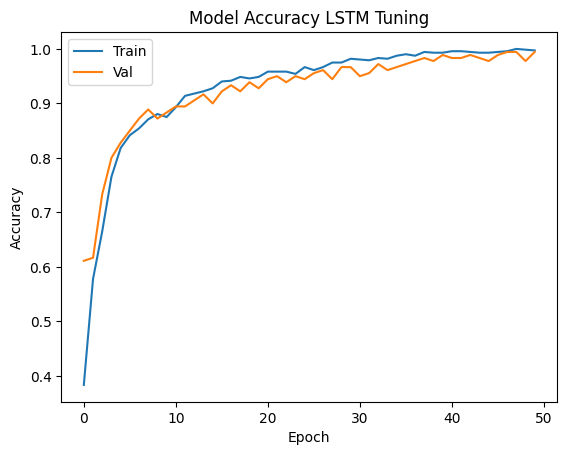

In [54]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy LSTM Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


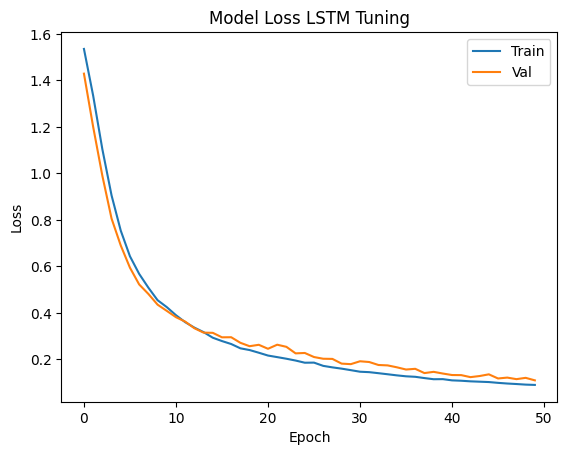

In [53]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss LSTM Tuning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [40]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

6/6 [==============================] - 0s 9ms/step - loss: 0.1103 - acc: 0.9944
Accuracy on test set is: 0.9944444298744202


In [41]:
X_test

array([[[-4.09322021e+02],
        [ 9.29311066e+01],
        [ 2.99934998e+01],
        ...,
        [ 7.81387615e-04],
        [ 6.07485592e-04],
        [ 5.12301456e-04]],

       [[-3.38748047e+02],
        [ 8.64199753e+01],
        [-4.67710495e+00],
        ...,
        [ 4.36755782e-03],
        [ 5.37504954e-03],
        [ 4.70581977e-03]],

       [[-4.41399689e+02],
        [ 1.01357124e+02],
        [ 4.54689255e+01],
        ...,
        [ 9.80828539e-04],
        [ 7.74331915e-04],
        [ 8.60290369e-04]],

       ...,

       [[-3.97370148e+02],
        [ 6.93135452e+01],
        [ 3.75740600e+00],
        ...,
        [ 5.42564271e-03],
        [ 3.96066206e-03],
        [ 4.91650915e-03]],

       [[-3.64638702e+02],
        [ 6.76277008e+01],
        [-1.83765335e+01],
        ...,
        [ 3.47357872e-03],
        [ 4.43596626e-03],
        [ 5.75952465e-03]],

       [[-3.79689911e+02],
        [ 6.97940750e+01],
        [-2.08189678e+01],
        ...,
        

In [42]:
model.predict(X_test)

6/6 [==============================] - 0s 9ms/step


array([[5.13230800e-04, 7.62650219e-04, 2.09458769e-04, 9.97350216e-01,
        1.16447348e-03],
       [9.42118764e-01, 1.40124690e-02, 6.02912530e-03, 3.73086743e-02,
        5.30920399e-04],
       [4.22415527e-04, 1.53071378e-04, 9.97141838e-01, 2.21724459e-03,
        6.55281838e-05],
       [3.23747694e-01, 5.33186793e-01, 1.31609336e-01, 1.10952184e-02,
        3.60938575e-04],
       [6.80075464e-05, 6.28177251e-04, 1.67545310e-04, 9.92439449e-01,
        6.69687754e-03],
       [9.84075904e-01, 3.46745690e-03, 9.13006719e-03, 3.24807456e-03,
        7.83948344e-05],
       [8.53896886e-03, 1.36180697e-02, 6.81332886e-01, 1.08330384e-01,
        1.88179612e-01],
       [1.40536088e-03, 1.93547341e-03, 1.30088210e-01, 7.88102686e-01,
        7.84682482e-02],
       [1.15927309e-02, 3.95184979e-02, 7.87362296e-05, 9.48409796e-01,
        4.00208635e-04],
       [2.60272808e-03, 4.42389486e-04, 1.54418312e-03, 9.95100737e-01,
        3.09856317e-04],
       [8.00440263e-04, 8.6997

In [43]:

# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

6/6 [==============================] - 0s 9ms/step


array([[34,  1,  0,  0,  0],
       [ 0, 31,  0,  0,  0],
       [ 0,  0, 38,  0,  0],
       [ 0,  0,  0, 35,  0],
       [ 0,  0,  0,  0, 41]])

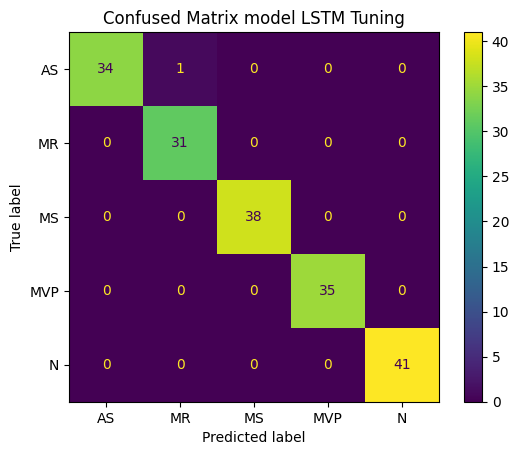

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.title('Confused Matrix model LSTM Tuning')
plt.show()

In [45]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [46]:
print('sensitivity: ', TPR)
print('specificity: ', TNR)
print('precision: ', PPV)
print('negative predictive value: ', NPV)
print('false positive rate: ', FPR)
print('false negative rate: ', FNR)
print('false discovery rate: ', FDR)
print('accuracy: ', ACC)
print('f1-score', 2*(PPV*TPR)/(PPV+TPR) )

sensitivity:  [0.97142857 1.         1.         1.         1.        ]
specificity:  [1.         0.99328859 1.         1.         1.        ]
precision:  [1.      0.96875 1.      1.      1.     ]
negative predictive value:  [0.99315068 1.         1.         1.         1.        ]
false positive rate:  [0.         0.00671141 0.         0.         0.        ]
false negative rate:  [0.02857143 0.         0.         0.         0.        ]
false discovery rate:  [0.      0.03125 0.      0.      0.     ]
accuracy:  [0.99444444 0.99444444 1.         1.         1.        ]
f1-score [0.98550725 0.98412698 1.         1.         1.        ]


In [47]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        41

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [48]:
# save h5
model_uri = '../modelh5/model_lstm_nontuning.h5'
model.save(model_uri)

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 112, 64)           16896     
                                                                 
 dense_4 (Dense)             (None, 112, 32)           2080      
                                                                 
 flatten_1 (Flatten)         (None, 3584)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                229440    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 250661 (979.14 KB)
Trainable params: 250

In [50]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
for i in range(1, 13):
  header += f' chroma{i}'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_105.wav')

1/1 [==============================] - 0s 390ms/step
[5.3599224e-06 1.3159242e-04 1.1029709e-04 1.6275427e-03 9.9812526e-01]
4
Predicted class: N


In [51]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,-455.038177,73.755302,10.247844,2.670123,-0.482979,-11.29778,-13.337904,-10.518919,-8.008946,...,0.001555,0.001038,0.001262,0.001623,0.001386,0.00131,0.001196,0.000847,0.000822,NaN
